In [10]:
import dlib
import cv2
import numpy as np
import mediapipe as mp
from math import hypot
import matplotlib.pyplot as plt

In [33]:
prev_gamma = 1.0
 
# Initialize a list to store the lookuptable for the change intensity operation.
intensity_table = []
 
# Iterate over 256 times.
for i in range(256):
 
    # Calculate the mapping output value for the i input value,
    # and clip (limit) the values between 0 and 255.
    # Also append it into the look-up table list.
    intensity_table.append(np.clip(a=pow(i/255.0, prev_gamma)*255.0, a_min=0, a_max=255))

In [34]:
def changeIntensity(image, scale_factor, channels_indexes, display=True):
    '''
    This function will change intensity of the color filters.
    Args:
        image:            The image on which the color filter intensity is required to be changed.
        scale_factor:     A number that will be used to calculate the required gamma value.
        channels_indexes: A list of indexes of the channels on which the color filter was applied.
        display:          A boolean value that is if set to true the function displays the original image,
                          and the output image, and returns nothing.
    Returns:
        output_image: A copy of the input image with the color filter intensity changed. 
    '''
    
    # Access the previous gamma value and the table contructed
    # with the previous gamma value.
    global prev_gamma, intensity_table
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    # Calculate the gamma value from the passed scale factor. 
    gamma = 1.0/scale_factor
    
    # Check if the previous gamma value is not equal to the current gamma value.
    if gamma != prev_gamma:
        
        # Update the intensity lookuptable to an empty list.
        # We will have to re-construct the table for the new gamma value.
        intensity_table = []
 
        # Iterate over 256 times.
        for i in range(256):
 
            # Calculate the mapping output value for the i input value 
            # And clip (limit) the values between 0 and 255.
            # Also append it into the look-up table list.
            intensity_table.append(np.clip(a=pow(i/255.0, gamma)*255.0, a_min=0, a_max=255))
        
        # Update the previous gamma value.
        prev_gamma = gamma
        
    # Iterate over the indexes of the channels.
    for channel_index in channels_indexes:
        
        # Change intensity of the channel of the image according to the lookup table.
        output_image[:,:,channel_index] = cv2.LUT(output_image[:,:,channel_index],
                                                  np.array(intensity_table).astype("uint8"))
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Color Filter");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Color Filter with Modified Intensity")
        plt.axis('off')
        
    # Otherwise.
    else:
    
        # Return the output image.
        return output_image

In [35]:
color_table = []
 
# Iterate over 128 times from 128-255.
for i in range(128, 256):
 
    # Extend the table list and add the i two times in the list.
    # We want to increase pixel intensities that's why we are adding only values > 127.
    # We are adding same value two times because we need total 256 elements in the list.
    color_table.extend([i, i])

In [36]:
def applyColorFilter(image, channels_indexes, display=True):
    '''
    This function will apply different interesting color lighting effects on an image.
    Args:
        image:            The image on which the color filter is to be applied.
        channels_indexes: A list of channels indexes that are required to be transformed.
        display:          A boolean value that is if set to true the function displays the original image,
                          and the output image with the color filter applied and returns nothing.
    Returns:
        output_image: The transformed resultant image on which the color filter is applied. 
    '''
    
    # Access the lookuptable containing the mapping we need.
    global color_table
    
    # Create a copy of the image.
    output_image = image.copy()
    
    # Iterate over the indexes of the channels to modify.
    for channel_index in channels_indexes:
        
        # Transform the channel of the image according to the lookup table.
        output_image[:,:,channel_index] = cv2.LUT(output_image[:,:,channel_index],
                                                  np.array(color_table).astype("uint8"))
        
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
        
        # Display the original input image and the resultant image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Sample Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    # Otherwise
    else:
 
        # Return the resultant image.
        return output_image

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


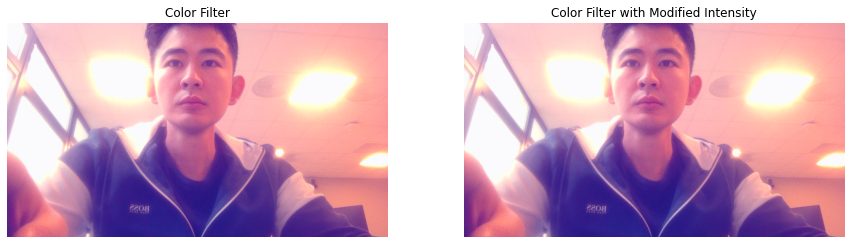

In [50]:
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)
 
# Create a named resizable window.
cv2.namedWindow('Color Filters', cv2.WINDOW_NORMAL)
 
# Create the function for the trackbar since its mandatory.
def nothing(x):
    pass
 
# Create trackbar named Intensity with the range [0-100].
cv2.createTrackbar('Intensity', 'Color Filters', 50, 100, nothing) 
        
# Attach the mouse callback function to the window.
#cv2.setMouseCallback('Color Filters', selectFilter)
 
# Initialize a variable to store the current applied filter.
filter_applied = 'Blue'
 
# Initialize a list to store the indexes of the channels 
# that were modified to apply the current filter.
# This list will be required to change intensity of the applied filter.
channels_indexes = []
 
# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
   
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then
    # continue to the next iteration to read the next frame.
    if not ok:
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the height and width of the frame of the webcam video.
    frame_height, frame_width, _ = frame.shape
    
    # Initialize a dictionary and store the copies of the frame with the 
    # filters applied by transforming some different channels combinations. 
    filters = {'Normal': frame.copy(), 
               'Blue': applyColorFilter(frame, channels_indexes=[0], display=False),
               'Green': applyColorFilter(frame, channels_indexes=[1], display=False), 
               'Red': applyColorFilter(frame, channels_indexes=[2], display=False),
               'Cyan': applyColorFilter(frame, channels_indexes=[0, 1], display=False),
               'Purple': applyColorFilter(frame, channels_indexes=[0, 2], display=False),
               'Yellow': applyColorFilter(frame, channels_indexes=[1, 2], display=False)}
    
    
    # Iterate over the filters dictionary.
    for filter_name, filter_applied_frame in filters.items():
        
        # Check if the filter we are iterating upon, is applied.
        if filter_applied == filter_name:
            
            # Set color to green.
            # This will be the border color of the filter preview.
            # And will be green for the filter applied and white for the other filters.
            color = (0,255,0)
            
        # Otherwise.
        else:
            
            # Set color to white.
            color = (255,255,255)
            
    
    # Update the frame with the currently applied Filter.
    frame = filters[filter_applied]
    
    # Get the value of the filter intensity from the trackbar.
    filter_intensity = 99 #cv2.getTrackbarPos('Intensity', 'Color Filters')/100 + 0.5
    
        
    # Change the intensity of the applied filter.
    frame = changeIntensity(frame, filter_intensity,
                            channels_indexes, True  )
 
    # Display the frame.
    cv2.imshow('Color Filters', frame)
    
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
 
# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()

In [51]:
camera_video.release()
cv2.destroyAllWindows()